In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_excel('E Commerce Dataset.xlsx', 'E Comm')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Total Sales Amount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030,2515.216874
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036,1457.869263
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,1238.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,2512.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,3800.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,5000.000000


In [5]:
data1 = data.copy()

In [6]:
data1 = data1.drop(columns = ['CustomerID'])

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

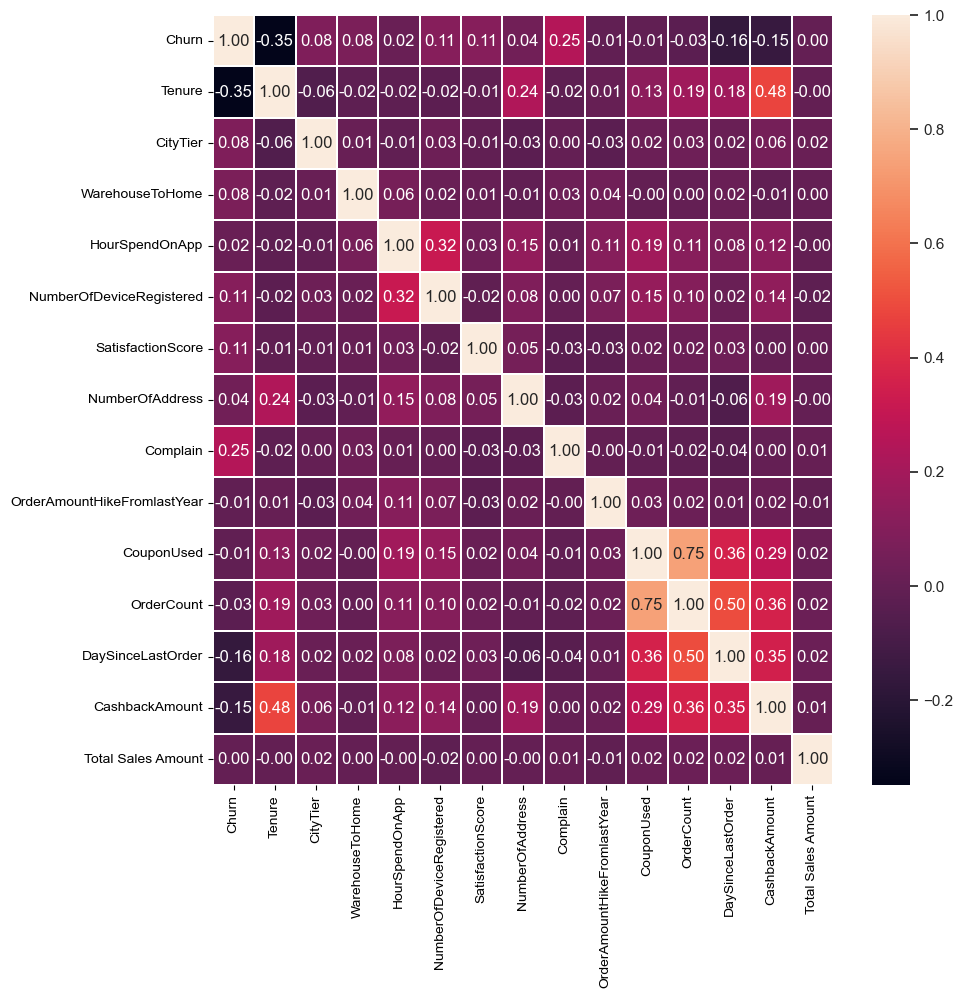

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap(data1.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

# Handling Missing values

Columns which has null values are Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed,
OrderCount,DaySinceLastOrder

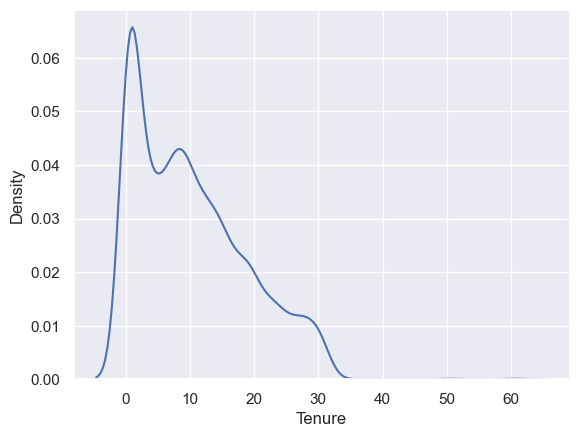

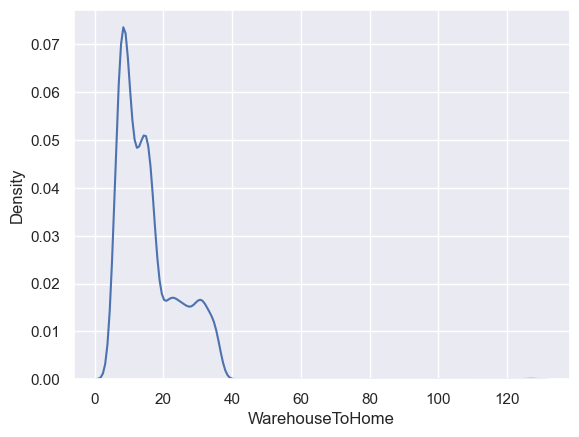

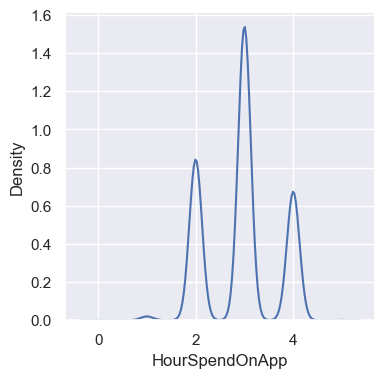

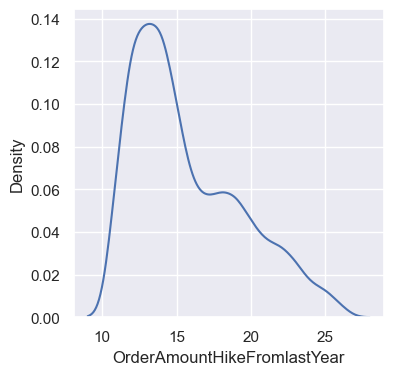

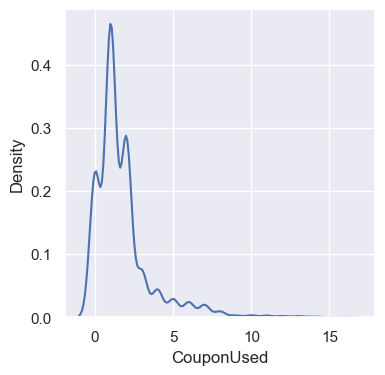

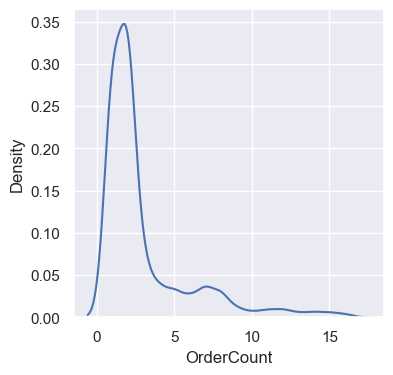

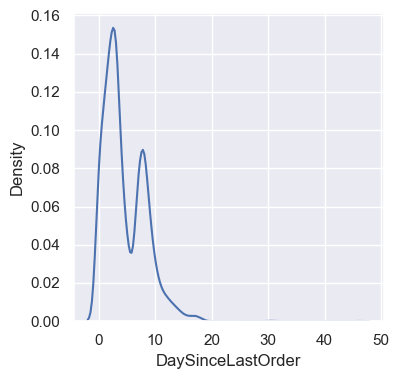

<Figure size 400x400 with 0 Axes>

In [9]:
# list(data1.columns.values)
columns =['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder']
for col in columns:
    # plot distplot
    sns.kdeplot(data=data1, x=f"{col}")
    plt.figure()
    sns.set(rc={"figure.figsize":(4,4)})
        

# Handling Missing values

In [10]:
nan_count_tenure = data1['Tenure'].isnull().sum().sum()
nan_count_tenure/data1['Tenure'].count()

0.049198658218412225

<Axes: xlabel='Tenure', ylabel='Count'>

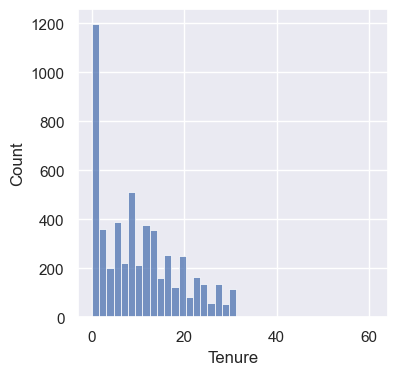

In [11]:
sns.histplot(data = data1, x = "Tenure")

Std Dev is very high for tenure therefore filling nan values would not be right approach. Let Substite with mode value and see how kde plot is changing

In [12]:
data1['Tenure'] = data1['Tenure'].fillna(2)

<Axes: xlabel='Tenure', ylabel='Density'>

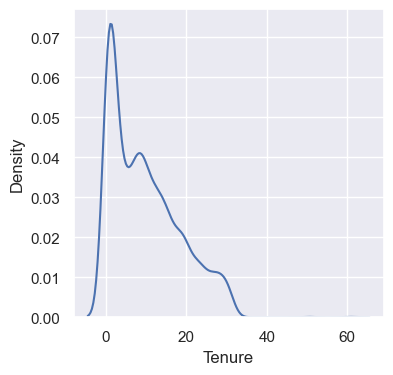

In [13]:
sns.kdeplot(data=data1, x="Tenure")

In [14]:
nan_count_tenure = data1['WarehouseToHome'].isnull().sum().sum()
nan_count_tenure/data1['WarehouseToHome'].count()


0.0466629485034393

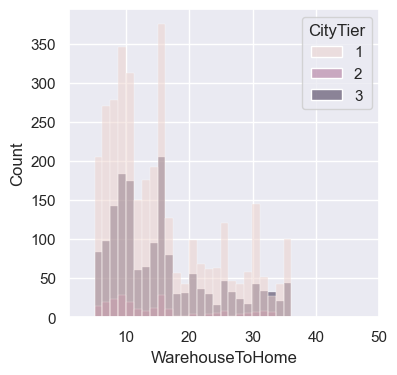

In [15]:
x = sns.histplot(data = data1, x = "WarehouseToHome",hue = "CityTier")
x.set_xlim(1, 50)
plt.show()

In [16]:
data1['WarehouseToHome'].mode()

0    9.0
Name: WarehouseToHome, dtype: float64

In [17]:
data1['WarehouseToHome'] = data1['WarehouseToHome'].fillna(9)

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

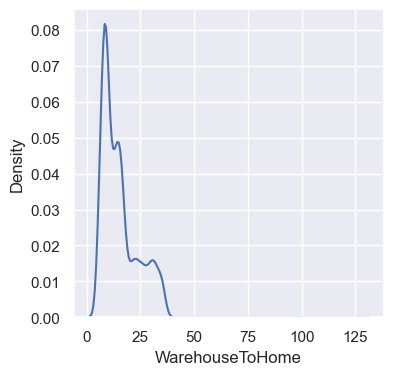

In [18]:
sns.kdeplot(data=data1, x="WarehouseToHome")

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

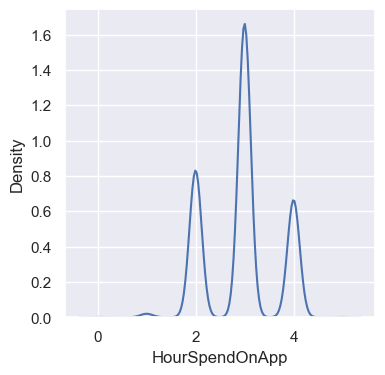

In [19]:
data1['HourSpendOnApp'] = data1['HourSpendOnApp'].fillna(3)
sns.kdeplot(data=data1, x="HourSpendOnApp")

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Count'>

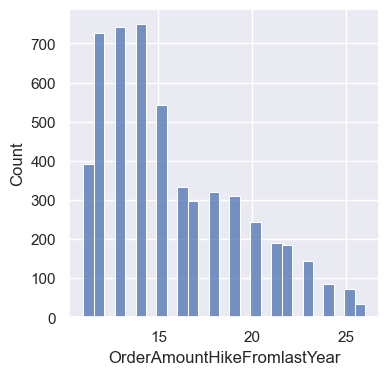

In [20]:
sns.histplot(data = data1, x = "OrderAmountHikeFromlastYear")

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

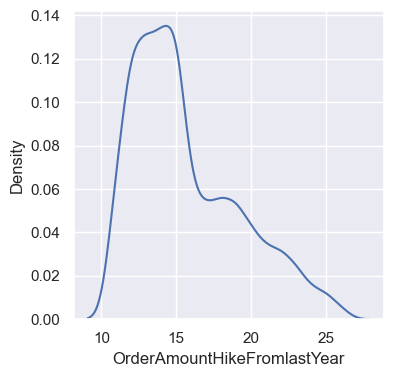

In [21]:
data1['OrderAmountHikeFromlastYear'] = data1['OrderAmountHikeFromlastYear'].fillna(15)
sns.kdeplot(data=data1, x="OrderAmountHikeFromlastYear")

In [22]:
filtered_data = data1[data1['CouponUsed'].isnull() | data1['OrderCount'].isnull()]


In [23]:
filtered_data

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Total Sales Amount
61,0,13.0,Mobile Phone,1,10.0,Credit Card,Female,2.0,3,Others,3,Divorced,2,0,14.0,NaN,9.0,9.0,290.33,3382
62,0,28.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,2,Others,4,Single,9,0,11.0,NaN,2.0,15.0,287.22,1634
64,0,24.0,Mobile Phone,1,9.0,Credit Card,Female,3.0,3,Grocery,4,Single,4,0,18.0,0.0,NaN,0.0,237.34,2735
69,0,18.0,Computer,1,8.0,Credit Card,Male,3.0,4,Grocery,2,Divorced,10,0,23.0,NaN,11.0,8.0,267.92,1969
90,0,14.0,Mobile Phone,3,12.0,Debit Card,Female,3.0,3,Fashion,2,Single,4,1,18.0,0.0,NaN,0.0,235.91,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,0,21.0,Computer,1,8.0,Credit Card,Female,4.0,4,Fashion,4,Married,2,0,19.0,1.0,NaN,13.0,244.57,1536
5590,0,12.0,Mobile Phone,1,17.0,Credit Card,Female,4.0,6,Fashion,3,Married,5,0,13.0,1.0,NaN,12.0,257.06,2695
5592,0,11.0,Mobile Phone,1,17.0,Debit Card,Female,3.0,2,Fashion,1,Married,3,1,26.0,NaN,7.0,9.0,262.44,1765
5621,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,233.54,3392


In [24]:
complete_cases = data1.dropna(subset=['CouponUsed', 'OrderCount'])
missing_cases = data1[data1['CouponUsed'].isnull() & data1['OrderCount'].notnull()]
# Prepare data for regression
X_train = complete_cases[['OrderCount']]
y_train = complete_cases['CouponUsed']

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values in 'CouponUsed'
X_missing = missing_cases[['OrderCount']]
predicted_coupon = model.predict(X_missing)

In [25]:
# Impute the predicted values back into the original dataframe
data1.loc[data1['CouponUsed'].isnull() & data1['OrderCount'].notnull(), 'CouponUsed'] = predicted_coupon

<Axes: xlabel='CouponUsed', ylabel='Density'>

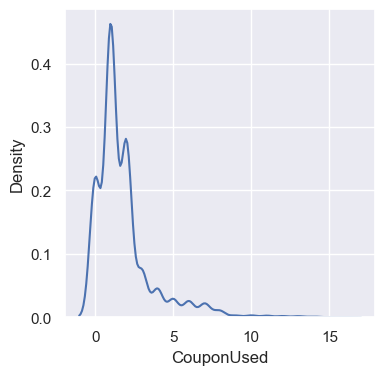

In [26]:
sns.kdeplot(data=data1, x="CouponUsed")

<Axes: xlabel='OrderCount', ylabel='Density'>

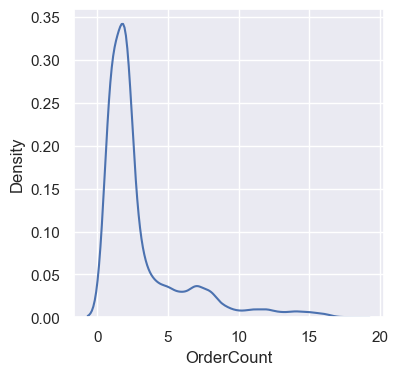

In [27]:
complete_cases = data1.dropna(subset=['CouponUsed', 'OrderCount'])
missing_cases = data1[data1['CouponUsed'].notnull() & data1['OrderCount'].isnull()]
# Prepare data for regression
X_train = complete_cases[['CouponUsed']]
y_train = complete_cases['OrderCount']

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values in 'CouponUsed'
X_missing = missing_cases[['CouponUsed']]
predicted_order = model.predict(X_missing)

# Impute the predicted values back into the original dataframe
data1.loc[data1['CouponUsed'].notnull() & data1['OrderCount'].isnull(), 'OrderCount'] = predicted_order

sns.kdeplot(data=data1, x="OrderCount")

In [28]:
data1['DaySinceLastOrder'].mode()

0    3.0
Name: DaySinceLastOrder, dtype: float64

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

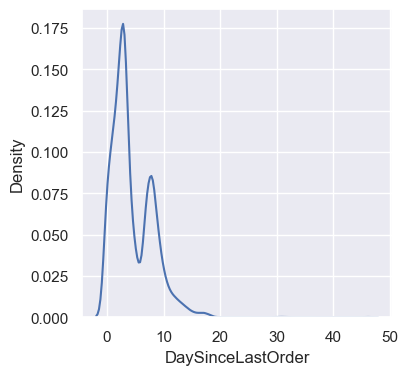

In [29]:
data1['DaySinceLastOrder'] = data1['DaySinceLastOrder'].fillna(3)
sns.kdeplot(data=data1, x="DaySinceLastOrder")

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

# Data Cleaning

In [31]:
data1['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [32]:
data1.PreferredLoginDevice.replace(['Mobile Phone'], ['Phone'], inplace=True)

In [33]:
data1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
data1['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [35]:
data1['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [36]:
data1.PreferedOrderCat.replace(['Mobile Phone'], ['Mobile'], inplace=True)

In [37]:
data1['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [38]:
data1.PreferredPaymentMode.replace(['Cash on Delivery','CC'], ['COD','Credit Card'], inplace=True)

There are certain numerical columns which are actually category columns and even columns with data type object should be converted to category for faster computation.

In [39]:
object_columns = data1.select_dtypes(include=['object']).columns 

In [40]:
# Convert columns to categorical
for column in object_columns:
    data1[column] = data1[column].astype('category')

Dealing with Numerical Columns

In [41]:
data1['CityTier'].unique()

array([3, 1, 2])

In [42]:
data1['SatisfactionScore'].unique()

array([2, 3, 5, 4, 1])

In [43]:
data1['Complain'].unique()

array([1, 0])

We have three numerical columns which are actually category
1. City Tier which is nominal. Therefore, we can directly convert them as category
2. SatisfactionScore is ordinal. We will convert them into category but we need to mention order as well.
3. Complain is binary (1/0) which we can keep as it is

In [44]:
# Convert 'CityTier' to a categorical data type without order
data1['CityTier'] = data1['CityTier'].astype('category')

# 'Complain' is already binary numerical, can be left as is or converted to boolean
data1['Complain'] = data1['Complain'].astype('bool')

# For 'SatisfactionScore', convert to ordered categorical if you want to preserve the order explicitly
satisfaction_order = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)
data1['SatisfactionScore'] = data1['SatisfactionScore'].astype(satisfaction_order)

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5630 non-null   int64   
 1   Tenure                       5630 non-null   float64 
 2   PreferredLoginDevice         5630 non-null   category
 3   CityTier                     5630 non-null   category
 4   WarehouseToHome              5630 non-null   float64 
 5   PreferredPaymentMode         5630 non-null   category
 6   Gender                       5630 non-null   category
 7   HourSpendOnApp               5630 non-null   float64 
 8   NumberOfDeviceRegistered     5630 non-null   int64   
 9   PreferedOrderCat             5630 non-null   category
 10  SatisfactionScore            5630 non-null   category
 11  MaritalStatus                5630 non-null   category
 12  NumberOfAddress              5630 non-null   int64   
 13  Com

In [46]:
category_columns = list(data1.select_dtypes(include=['category']).columns) 
category_columns.append('Complain')
len(category_columns)

8

In [47]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

data1['RecencyScore'] = pd.cut(data1['DaySinceLastOrder'], bins = 5, labels= recency_scores)
data1['FrequencyScore'] = pd.cut(data1['OrderCount'], bins = 5, labels= frequency_scores)
data1['MonetaryScore'] = pd.cut(data1['Total Sales Amount'], bins= 5, labels= monetary_scores)

In [48]:
# Convert RFM scores to numeric type
data1['RecencyScore'] = data1['RecencyScore'].astype(int)
data1['FrequencyScore'] = data1['FrequencyScore'].astype(int)
data1['MonetaryScore'] = data1['MonetaryScore'].astype(int)

In [49]:
data1['RFM_Score'] = data1['RecencyScore'] + data1['FrequencyScore'] + data1['MonetaryScore']

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data1['Value Segment'] = pd.qcut(data1['RFM_Score'], q= 3, labels= segment_labels)

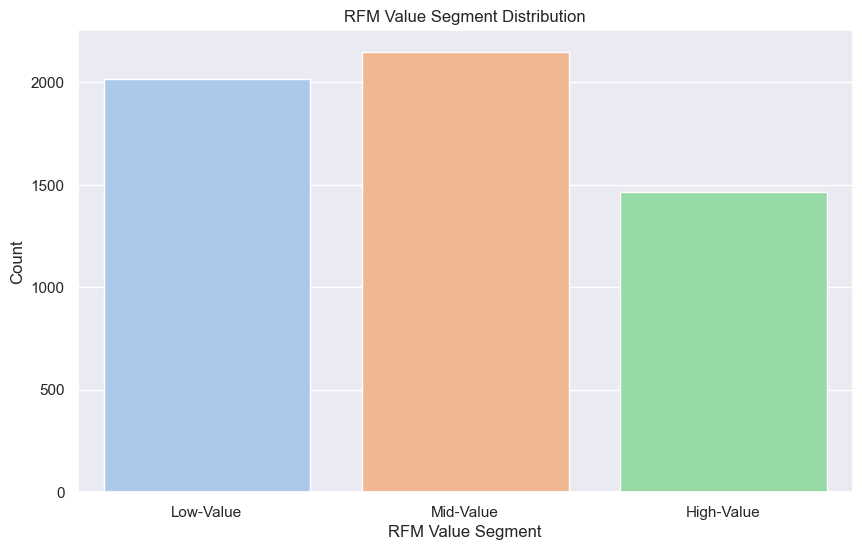

In [50]:
segment_counts = data1['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(10,6))
sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)

plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')

plt.show()

In [51]:
data1['RFM_Score'].describe()

count    5630.000000
mean        9.274778
std         1.635453
min         6.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        15.000000
Name: RFM_Score, dtype: float64

In [52]:
data1['RFM Customer Segments'] = ''
data1.loc[data1['RFM_Score'] >= 12, 'RFM Customer Segments'] = 'Champions'
data1.loc[(data1['RFM_Score'] >= 10) & (data1['RFM_Score'] < 12), 'RFM Customer Segments'] = 'Potential Loyalists'
data1.loc[(data1['RFM_Score'] >= 7) & (data1['RFM_Score'] < 10), 'RFM Customer Segments'] = 'At-Risk Customers'
data1.loc[(data1['RFM_Score'] >= 6) & (data1['RFM_Score'] < 7), 'RFM Customer Segments'] = 'Lost'

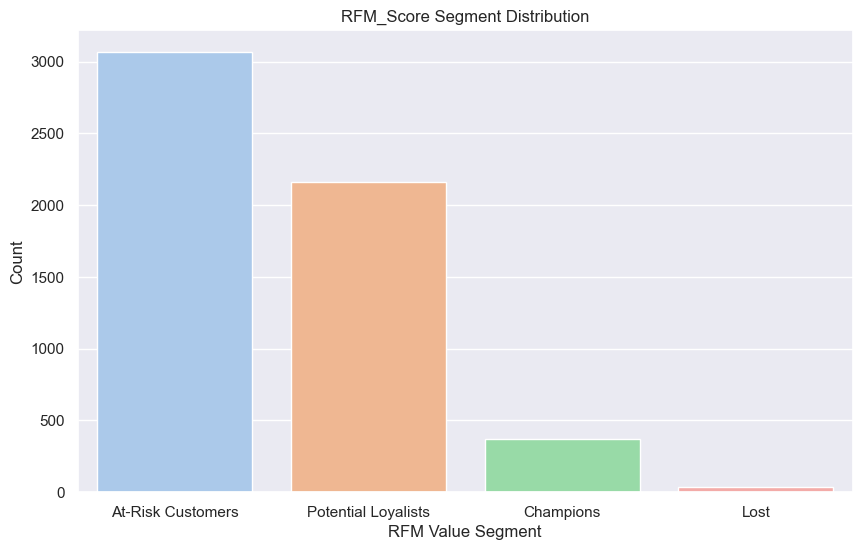

In [53]:
segment_counts = data1['RFM Customer Segments'].value_counts().reset_index()
segment_counts.columns = ['RFM Customer Segments', 'Count']

pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(10,6))
sns.barplot(data = segment_counts, x = 'RFM Customer Segments', y = 'Count', palette= pastel_colors)

plt.title('RFM_Score Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')

plt.show()

In [54]:
category_columns.append('RFM Customer Segments')

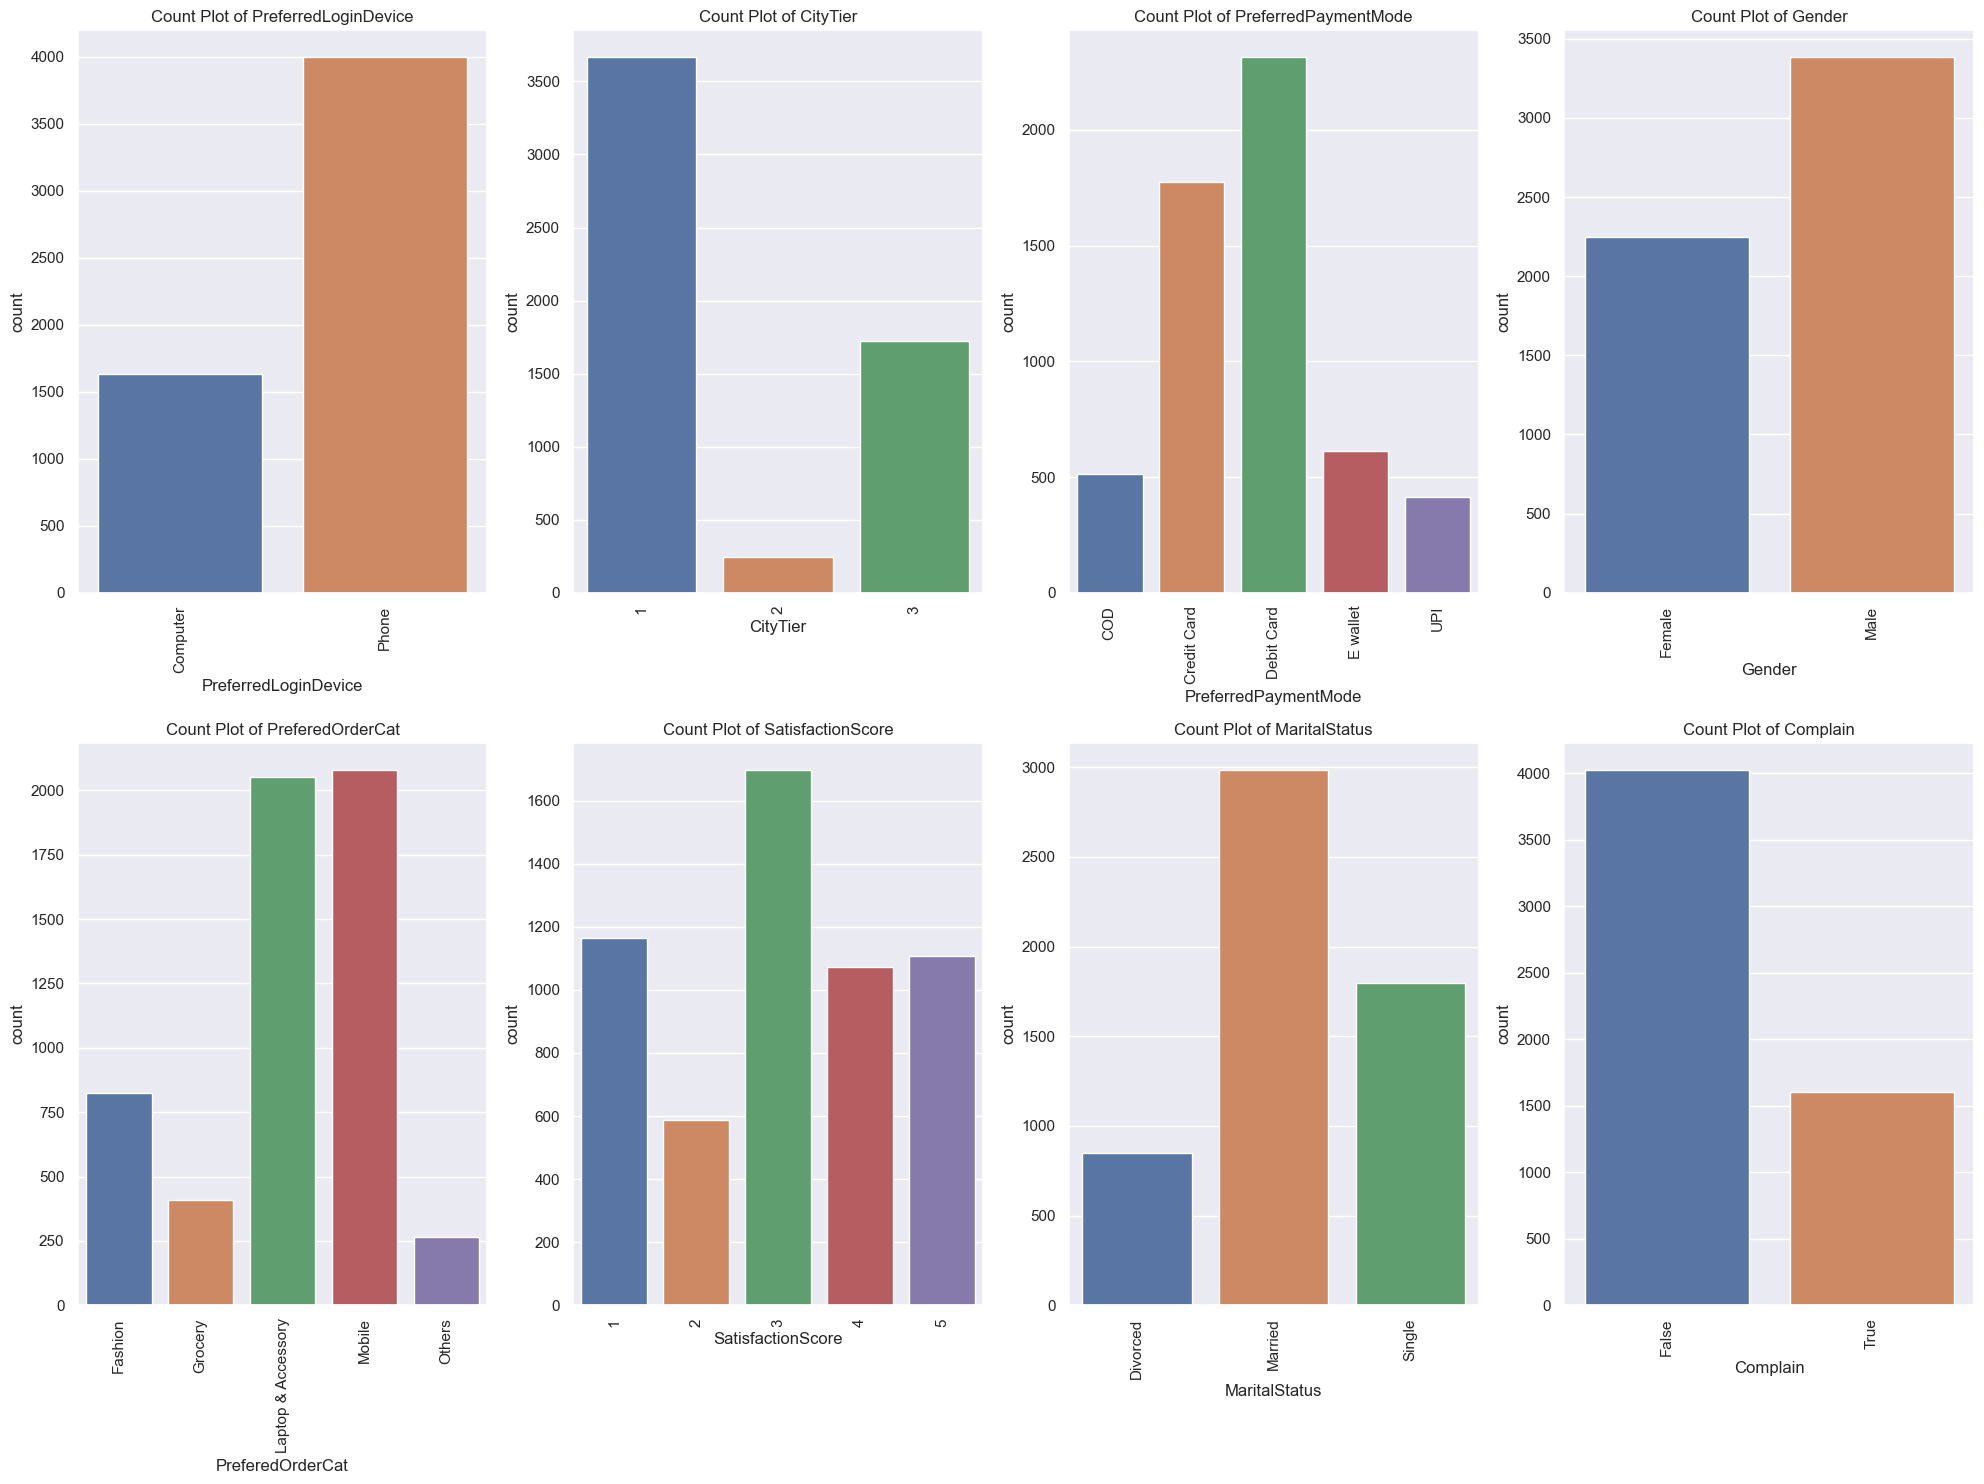

In [55]:
# Loop over the list of columns and the axs array to plot count plots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))  # Adjust figsize if needed

for ax, column in zip(axs.flatten(), category_columns):
    sns.countplot(data=data1, x=column, ax=ax)
    ax.set_title(f'Count Plot of {column}')  # Optional: Set a title for each subplot
    ax.tick_params(axis='x', rotation=90)  # Optional: Rotate x labels for readability

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

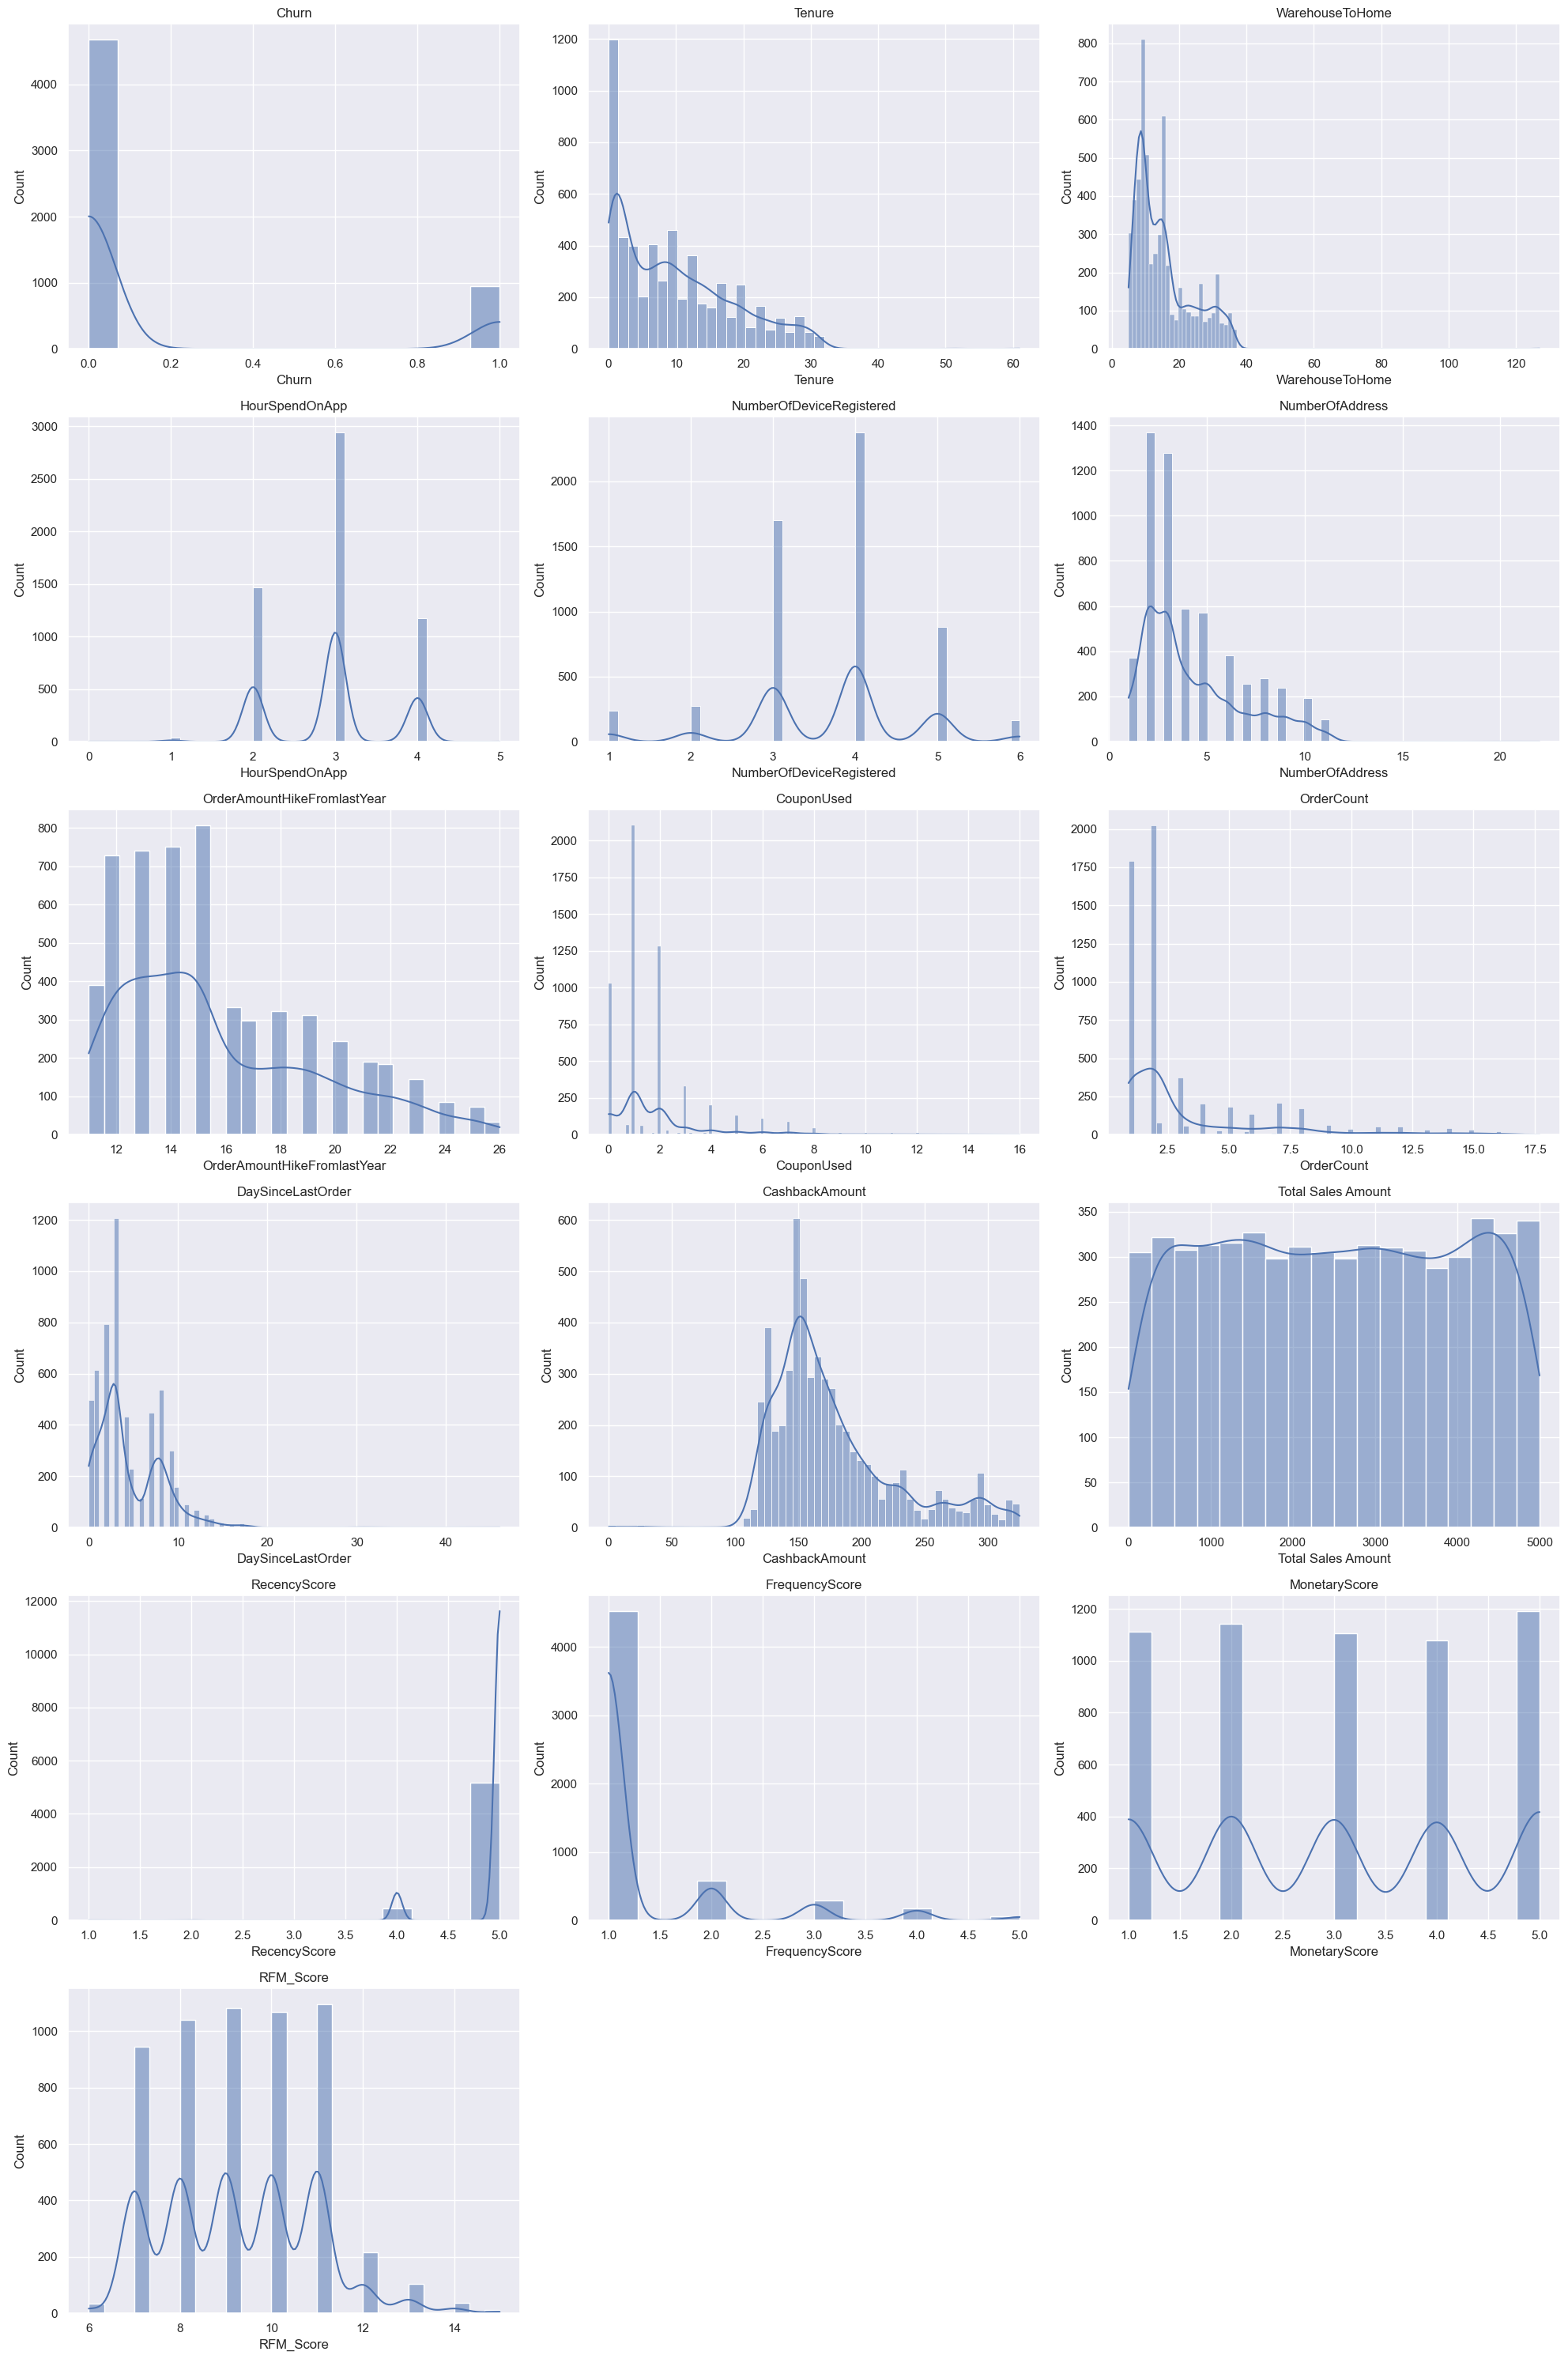

In [56]:
numerical_columns = data1.select_dtypes(include=['int64', 'float64']).columns

# Assuming you have 6 numerical columns, adjust nrows and ncols as needed
nrows = int(np.ceil(len(numerical_columns) / 3))  # Adjust based on the number of numerical columns
fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5))  # Adjust the size as needed

for ax, column in zip(axs.flatten(), numerical_columns):
    sns.histplot(data=data1, x=column, kde=True, ax=ax)  # Using histplot for distribution
    ax.set_title(column)

# If you have less plots than subplots, hide the empty ones
for i in range(len(numerical_columns), nrows*3):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

I checked if our numerical plots change by different categories like CityTier, Gender, Marital status. However, distribution for them nearly remains the same.

Observations:
    1. Our customers order from phone more.
    2. City Tier 1 has more number of orders.
    3. People prefer Debit Card are more prefered followed by credit card.
    4. More male customers.
    5. Laptop & Accessories, Mobile are brought by our customers.
    6. Most customers have given satisfaction score as 3
    7. More married customers. 
    8. Less number of complaints.

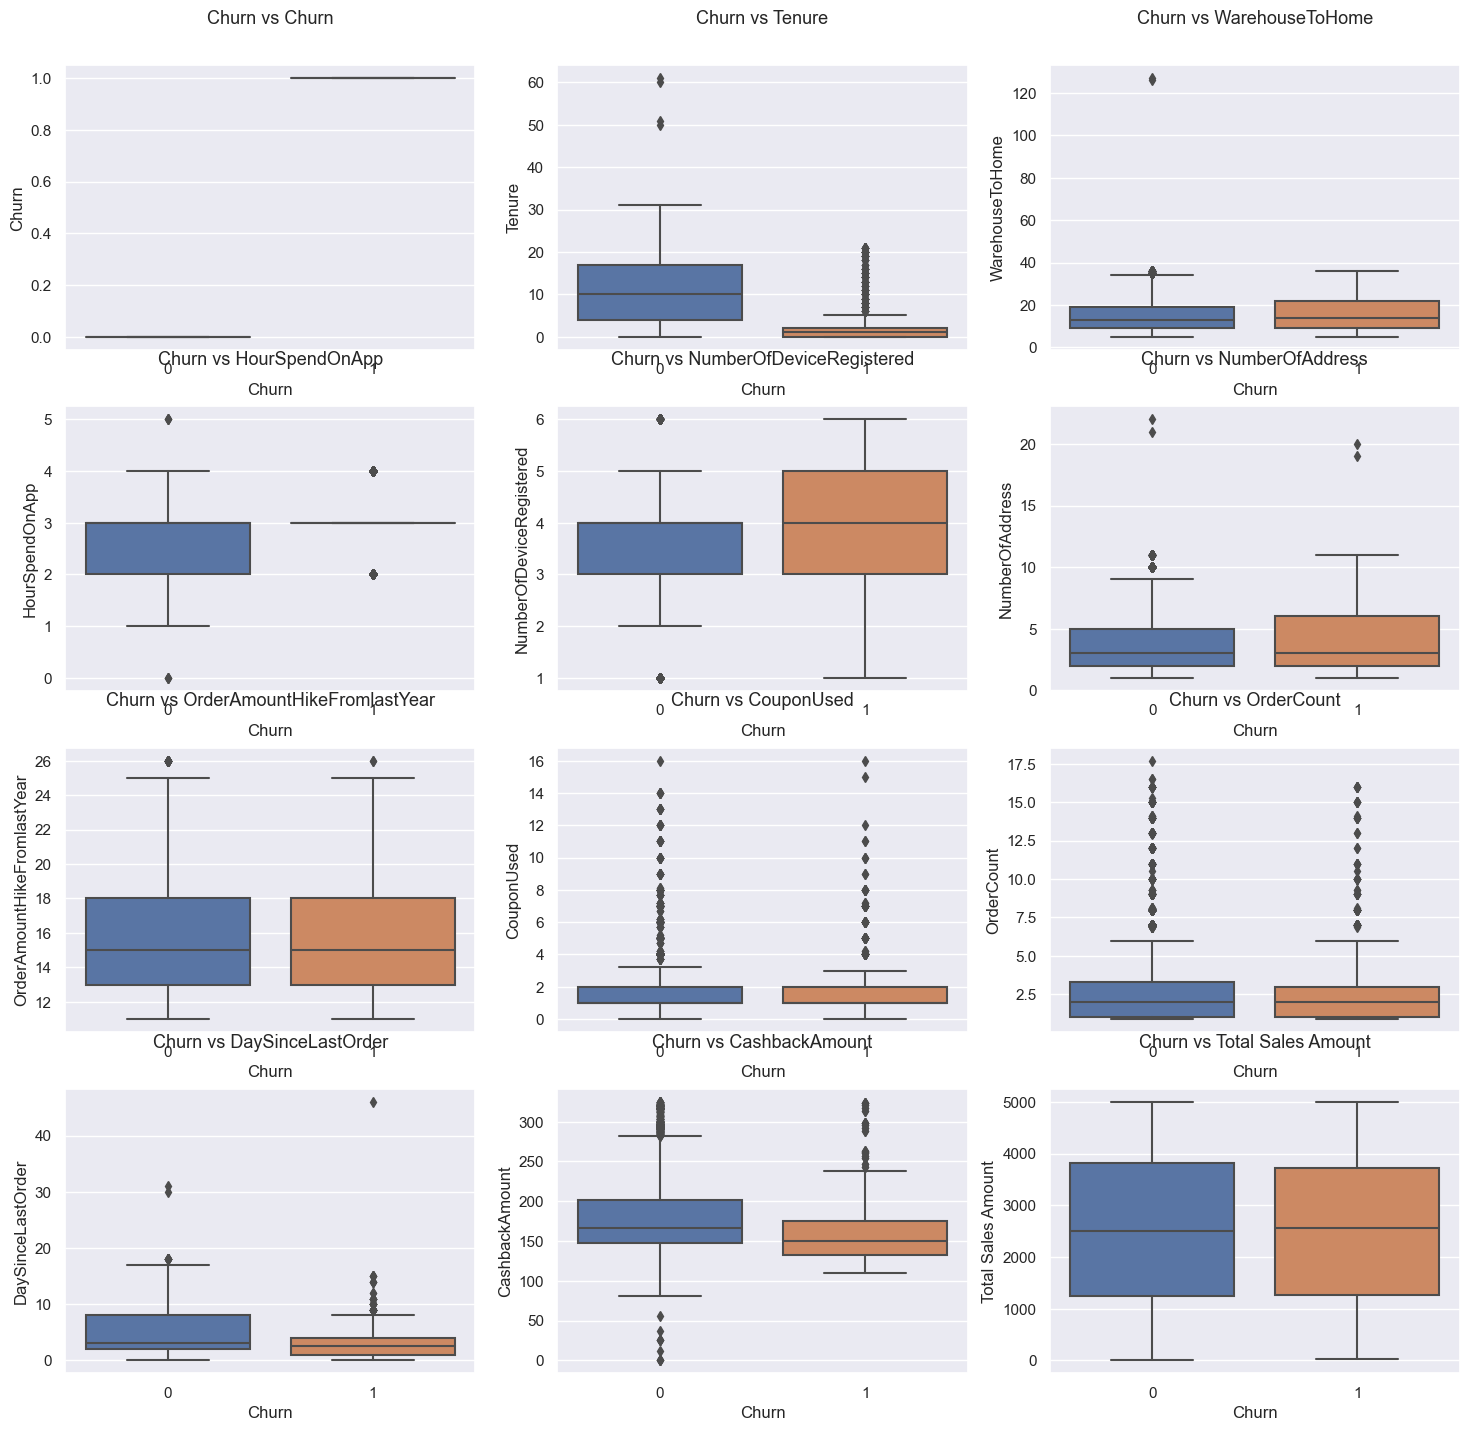

In [57]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(4):
    for j in range(3):
        sns.boxplot(data=data1, x='Churn', y=numerical_columns[count], ax=axs[i,j])
        axs[i,j].set_title(f"Churn vs {numerical_columns[count]}", pad = 30 ,fontsize=13)
        count += 1

We observe here that Coupon used and Order count have lots of outliers but in our case these outliers are important as these can be potentially high valued customers which are necessary fo our analysis.

There are certain interesting observations we see here
1. Customers who churn have lower tenures as compare to those who don't.
2. Customers who churn have more number of addresses which can mean that the same account was being used by many people. Which can also be backed by the observation we see that there are more number of registered devices.
3. distribution of DaySinceLastOrder is lower for churned customer which can mean that maybe there were not very satisfied or something like that as they had ordered recently.
4. We see that cashbackamount for churned customers is lower than unchurned customers. So this can be one of the reason of churning and we can focus on this area.

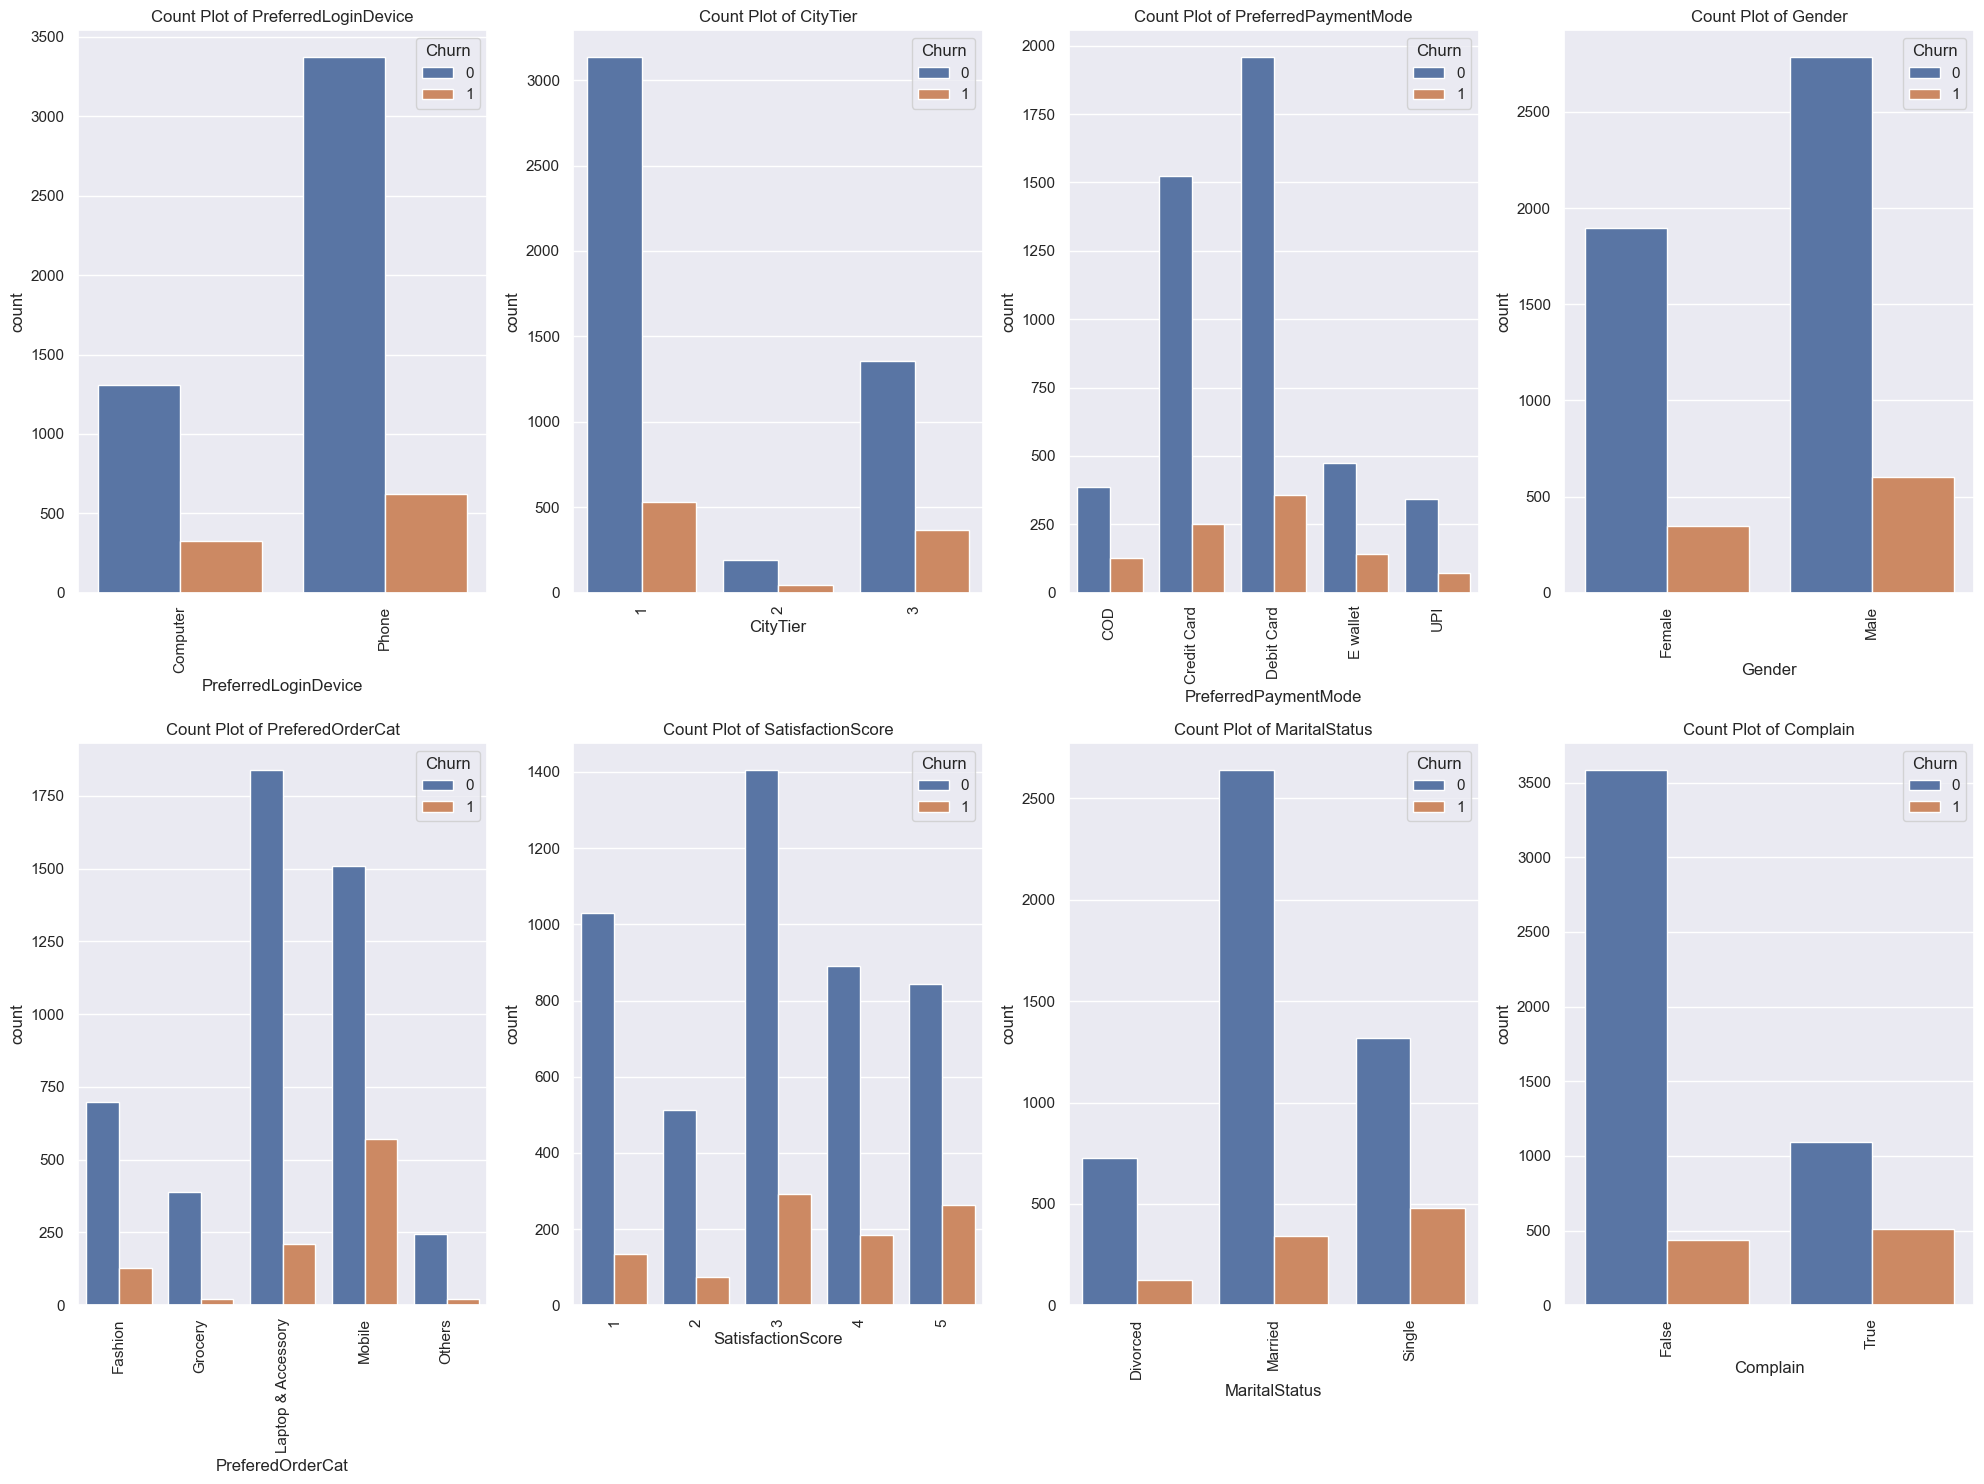

In [58]:
# Loop over the list of columns and the axs array to plot count plots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))  # Adjust figsize if needed

for ax, column in zip(axs.flatten(), category_columns):
    sns.countplot(data=data1, hue = 'Churn',x=column, ax=ax)
    ax.set_title(f'Count Plot of {column}')  # Optional: Set a title for each subplot
    ax.tick_params(axis='x', rotation=90)  # Optional: Rotate x labels for readability

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [59]:
import pandas as pd

# Assuming data1 is your DataFrame and 'Churn' is the column with binary values where 1 indicates churn and 0 indicates no churn.

# Define your categorical columns list (replace this list with your actual categorical columns)
categorical_columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']

# Create an empty DataFrame to store the percentage distribution for each categorical variable
percentage_distributions = pd.DataFrame()

# Loop over each categorical column
for column in categorical_columns:
    # Calculate the percentage distribution of churn within each category
    distribution = data1.groupby(column)['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

    # Pivot the table to get better format
    pivot_distribution = distribution.pivot(index=column, columns='Churn', values='Percentage')

    # Rename the columns for better understanding
    pivot_distribution.columns = ['No Churn (%)', 'Churn (%)']

    # Add a 'Category' column to identify the category in the combined DataFrame
    pivot_distribution['Category'] = column

    # Append the results to the combined DataFrame
    percentage_distributions = pd.concat([percentage_distributions, pivot_distribution])

# Reset index to include it as a column in the DataFrame
percentage_distributions.reset_index(inplace=True)

# If you want to see the full DataFrame without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [60]:
percentage_distributions

,index,No Churn (%),Churn (%),Category
0,Computer,80.171359,19.828641,PreferredLoginDevice
1,Phone,84.384384,15.615616,PreferredLoginDevice
2,1,85.488271,14.511729,CityTier
3,2,80.165289,19.834711,CityTier
4,3,78.629501,21.370499,CityTier
5,COD,75.097276,24.902724,PreferredPaymentMode
6,Credit Card,85.794814,14.205186,PreferredPaymentMode
7,Debit Card,84.615385,15.384615,PreferredPaymentMode
8,E wallet,77.198697,22.801303,PreferredPaymentMode
9,UPI,82.608696,17.391304,PreferredPaymentMode


We can come come up couple of Hypothesis from the above chart
1. We see that people using Computer Churn more compare to Mobile Phone, even though customers using phone are more. 
2. Customers from City Tier 3 are churning more. We can grill more to identify the issue. It can be more number of delivery days. 
3. Customers using cod and ewallet payment mode churn more.
4. Male customers are churning more. We can identify in which categories we find the male customers are churning more. 
5. Mobile categories have more churning rate
6. People who give high satisfaction score are churning more.
7. Single People churn more.
8. People who have put complaints have higher churn rate which makes sense.

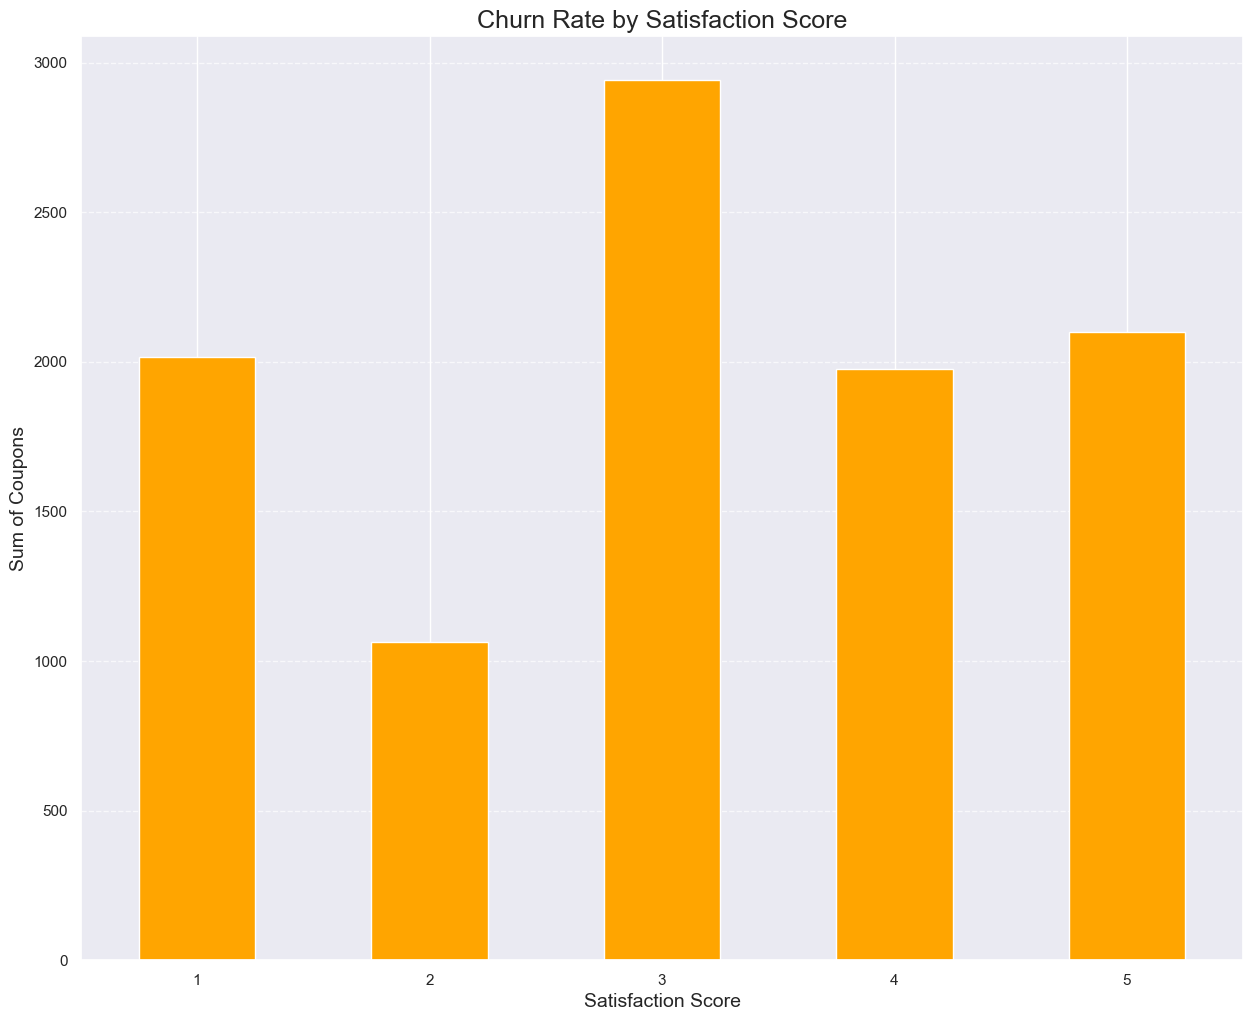

In [61]:
# Group by the rounded 'CouponUsed' and calculate the churn rate for each group
coupon_churn_rate = data1.groupby('SatisfactionScore')['CouponUsed'].sum()

# Creating a plot to visualize the relationship
plt.figure(figsize=(15, 12))
coupon_churn_rate.plot(kind='bar', color='orange')
plt.title('Churn Rate by Satisfaction Score', size=18)
plt.xlabel('Satisfaction Score', size=14)
plt.ylabel('Sum of Coupons', size=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We see that we have not been targeting in an effective way. So we need to reevaluate our promotions strategy

In [62]:

# Assuming 'data1' is your DataFrame with the actual dataset already loaded

# Calculate the percentage of each PreferredOrderCat for each combination of Gender and Churn
gender_churn_order_pct = pd.crosstab(
    [data1['Gender'], data1['Churn']],
    data1['PreferedOrderCat'],
    normalize='index'
) * 100

# Reset index to turn the MultiIndex into columns
gender_churn_order_pct.reset_index(inplace=True)

# Rename the columns for clarity if needed
gender_churn_order_pct.columns = ['Gender', 'Churn'] + [f'{col} (%)' for col in gender_churn_order_pct.columns[2:]]

gender_churn_order_pct

,Gender,Churn,Fashion (%),Grocery (%),Laptop & Accessory (%),Mobile (%),Others (%)
0,Female,0,16.122234,10.221286,40.674394,29.083246,3.898841
1,Female,1,13.793103,1.149425,20.689655,60.919540,3.448276
2,Male,0,14.080460,7.040230,38.362069,34.410920,6.106322
3,Male,1,13.333333,2.666667,23.000000,59.666667,1.333333


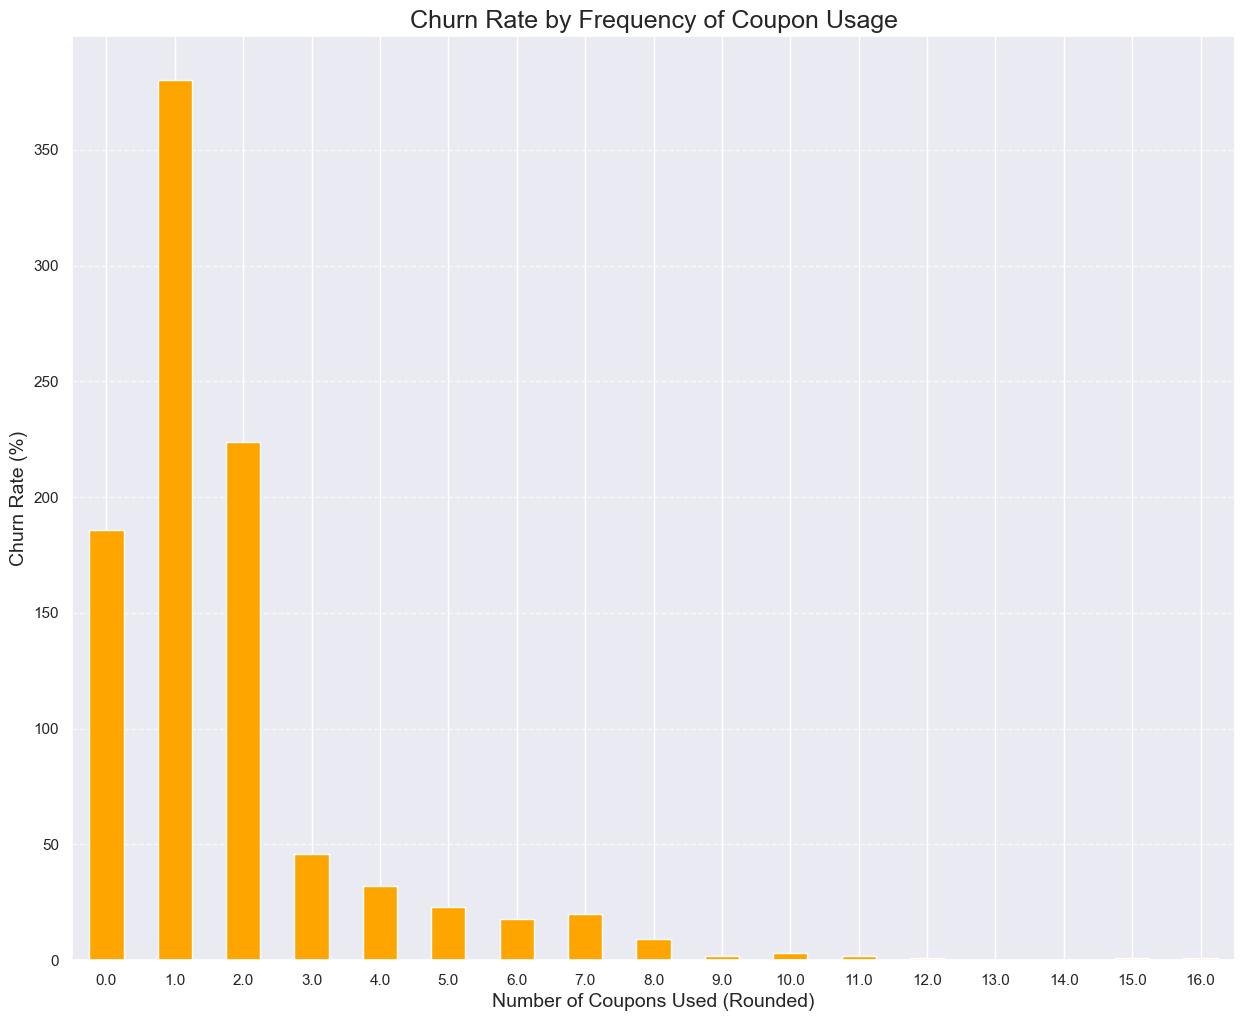

In [63]:

# Round 'CouponUsed' to the nearest integer
data1['CouponUsed'] = np.rint(data1['CouponUsed'])

# Group by the rounded 'CouponUsed' and calculate the churn rate for each group
coupon_churn_rate = data1.groupby('CouponUsed')['Churn'].sum()

# Creating a plot to visualize the relationship
plt.figure(figsize=(15, 12))
coupon_churn_rate.plot(kind='bar', color='orange')
plt.title('Churn Rate by Frequency of Coupon Usage', size=18)
plt.xlabel('Number of Coupons Used (Rounded)', size=14)
plt.ylabel('Churn Rate (%)', size=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations
1. Decrease churnrate by giving more coupons 
2. Target effectively
3. Males churn more in categories Groceries, Laptop & Accessory

# Modelling

In [64]:
cleaned_data = data1.copy()

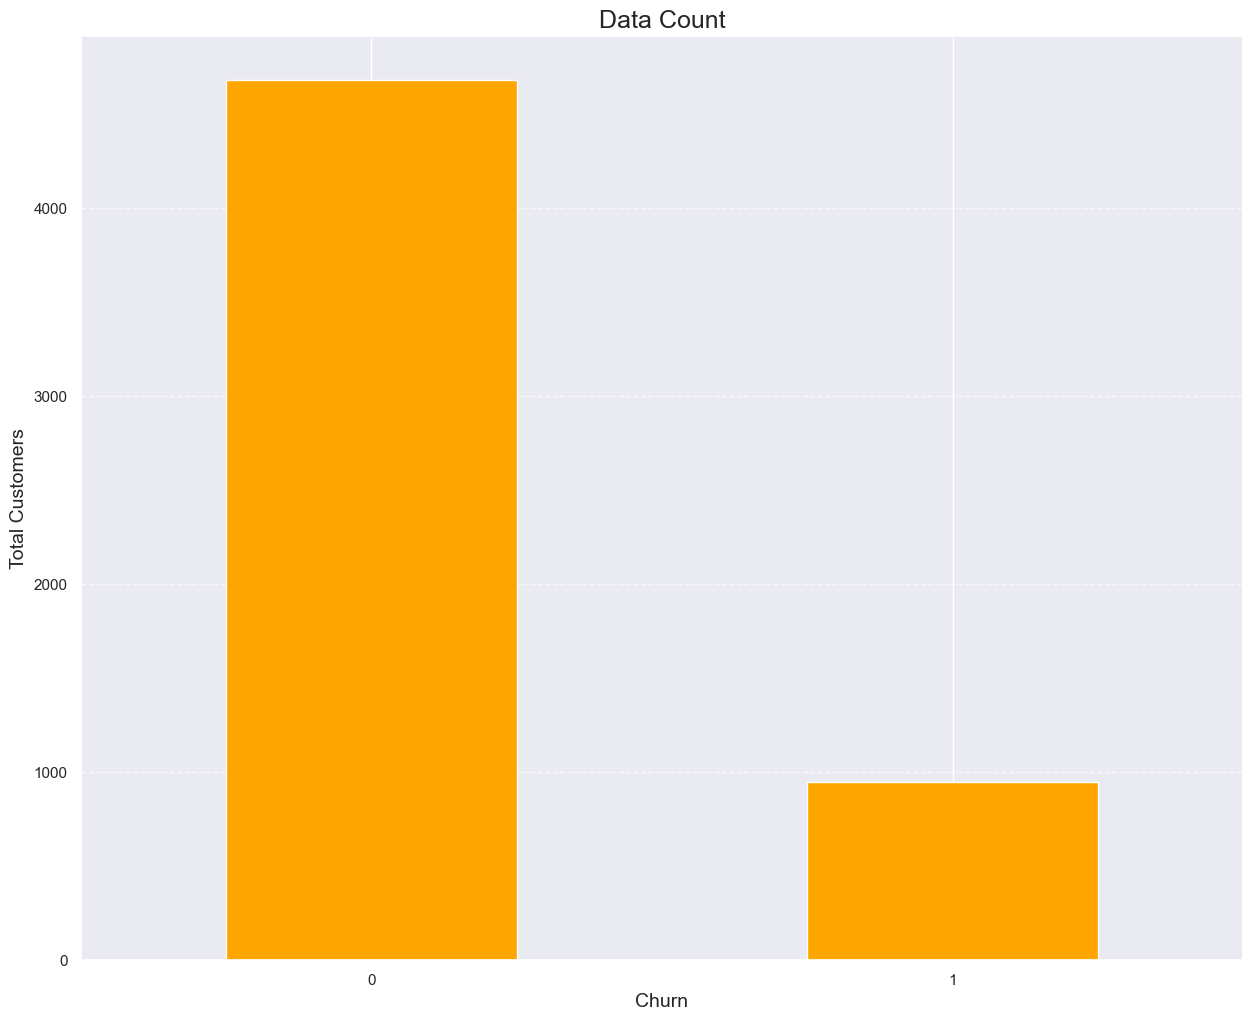

In [65]:
# Group by the rounded 'CouponUsed' and calculate the churn rate for each group
total_count = data.groupby('Churn')['CustomerID'].count()

# Creating a plot to visualize the relationship
plt.figure(figsize=(15, 12))
total_count.plot(kind='bar', color='orange')
plt.title('Data Count', size=18)
plt.xlabel('Churn', size=14)
plt.ylabel('Total Customers', size=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
#Use one-hot encoding to create binary columns for each category:
categorical_cols = list(data1.select_dtypes(include=['object', 'category']).columns)
categorical_cols

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Value Segment',
 'RFM Customer Segments']

In [67]:
categorical_cols.remove('SatisfactionScore')

In [68]:
data1 = pd.get_dummies(data1, columns=categorical_cols, drop_first=True)

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['SatisfactionScore'] = le.fit_transform(data1['SatisfactionScore'])

In [70]:
X = data1.drop('Churn', axis=1)
Y = data1['Churn']

In [71]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)
x_over.shape, y_over.shape

((9114, 36), (9114,))

# Split the data

In [72]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [73]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

# MN = MinMaxScaler()
# SC = StandardScaler()
Rb = RobustScaler()
x_train_scaled = Rb.fit_transform(x_train)
x_test_scaled = Rb.fit_transform(x_test)

In [74]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()

In [75]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

Comparing Recall makes much more sense here As I care about my false negative values more than my false positive

In [76]:
train_rec_list = []
test_rec_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Recall Trainning Score: {recall_score(y_train, y_pred_train)}')
    print(f'Recall Testing Score: {recall_score(y_test, y_pred_test)}')
    train_rec_list.append(recall_score(y_train, y_pred_train))
    test_rec_list.append(recall_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Recall Trainning Score: 0.8857232310582341
Recall Testing Score: 0.8928833455612619
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Recall Trainning Score: 0.9342517219787101
Recall Testing Score: 0.9068231841526045
                                                            
************************************************************
                                                            
Using model: Decision Tree
Recall Trainning Score: 1.0
Recall Testing Score: 0.917094644167278
                                                            
************************************************************
                                                            
Using model: Random Forest
Recall Trainning Score: 1.0
Recall Testing Score: 0.9559794570799707
                       

Bagging is usually applied where the classifier is unstable and has a high variance. Boosting is usually applied where the classifier is stable and simple and has high bias.

In our case, Decision Tree, Random Forest and XGB classifier has very high training recall value. Which can also mean they are overfitting. However, the drop in recall value in minimum for XGB boost which can suggest thatour classifier is stable but have high bias

 Decision Tree are performing significantly better on training data than on test data, it suggests high variance.

In [77]:
from sklearn.linear_model import LassoCV

# Assuming X_train and y_train are your feature matrix and target vector
# This will use cross-validation to find an optimal alpha
lasso_cv = LassoCV(cv=5).fit(x_train_scaled, y_train)

print("Optimal alpha:", lasso_cv.alpha_)

print("Coefficients:", lasso_cv.coef_)


Optimal alpha: 0.0001869363509362643
Coefficients: [-0.22158657  0.02636049  0.00068925  0.01822541  0.0424294   0.07627779
  0.25004412 -0.01007637 -0.00562176  0.08165847 -0.05657609 -0.06090256
  0.02791105 -0.05742511 -0.09995329  0.          0.09215118 -0.07174501
 -0.          0.0099656  -0.29422973 -0.25330056 -0.17167791 -0.32011556
 -0.01895461  0.         -0.25044322 -0.119998    0.10771267 -0.16520294
 -0.05627252 -0.07842872 -0.11144727 -0.0876774  -0.         -0.05302861]


In [78]:
print(x_train.columns)
print(len(x_train.columns))

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Total Sales Amount',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'PreferredLoginDevice_Phone', 'CityTier_2', 'CityTier_3',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Value Segment_Mid-Value',
       'Value Segment_High-Value', 'RFM Customer Segments_Champions',
       'RFM Customer Segments_Lost',
       'RFM Customer Segments_Potential Loyalists'],
      dtype='object')
36


Using Lasso Regularization, coefficients array shows the effect of each feature on the likelihood of churn, under the regularization strength determined by this alpha value.
Lets observe for each of these factors and identify if we should remove these features or not.

CityTier_2 and CityTier_3 have coefficients as 0.
Lets calculate if there is a difference or we see any specific to have higher percentage of churn.

In [79]:
city_info = cleaned_data.groupby(['CityTier','Churn'])['CityTier'].count()
city_info

CityTier  Churn
1         0        3134
          1         532
2         0         194
          1          48
3         0        1354
          1         368
Name: CityTier, dtype: int64

In [80]:
#for CityTier - 1 
churn_tier_1 = 532/3134
churn_tier_2 = 48/194
churn_tier_3 = 368/1354
print(churn_tier_1,churn_tier_2,churn_tier_3)

0.16975111678366306 0.24742268041237114 0.2717872968980798


In [81]:
from sklearn.linear_model import LogisticRegressionCV

# For L1 regularization
clf_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', scoring='accuracy').fit(x_train_scaled, y_train)

print("Optimal C (inverse of regularization strength) for L1:", clf_l1.C_)

Optimal C (inverse of regularization strength) for L1: [0.35938137]


In [82]:
print("Coefficients:", clf_l1.coef_)


Coefficients: [[-2.46057183e+00  2.86769107e-01  2.09485658e-03  2.24445534e-01
   3.48605915e-01  8.81141746e-01  2.12660595e+00 -8.14858403e-02
  -5.72385424e-02  8.81093095e-01 -4.62465290e-01 -6.20590669e-01
   3.66408148e-01 -2.08184606e-01 -7.77068361e-01  4.57861625e-01
   0.00000000e+00 -6.46825611e-01  0.00000000e+00  9.12953816e-03
  -2.49825469e+00 -2.19256183e+00 -1.37346383e+00 -2.49839933e+00
  -1.20691327e-01 -2.23489441e-01 -2.54375074e+00 -1.56154184e+00
   9.68570568e-01 -1.41773815e+00 -4.67833631e-01 -7.10209804e-01
  -8.59911387e-01 -9.44222367e-01  0.00000000e+00 -5.01289052e-01]]


In [83]:
# For L1 Regularized Logistic Regression
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.25)
logistic_l1.fit(x_train_scaled, y_train)

print(print(x_train.columns))
print("Coefficients:", logistic_l1.coef_)


Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Total Sales Amount',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'PreferredLoginDevice_Phone', 'CityTier_2', 'CityTier_3',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Value Segment_Mid-Value',
       'Value Segment_High-Value', 'RFM Customer Segments_Champions',
       'RFM Customer Segments_Lost',
       'RFM Customer Segments_Potential Loyalists'],
      dtype='object')
None
Coefficients: [[

In [84]:
i = 0
for i in range(len(x_train.columns)):
    print(x_train.columns[i],logistic_l1.coef_[0][i])

Tenure -2.4177620614879918
WarehouseToHome 0.2776436939579679
HourSpendOnApp 0.0
NumberOfDeviceRegistered 0.2100011508233158
SatisfactionScore 0.3342824507381454
NumberOfAddress 0.8602238227415383
Complain 2.0979931582095563
OrderAmountHikeFromlastYear -0.07352091062032635
CouponUsed -0.05325010024788859
OrderCount 0.8443392459024661
DaySinceLastOrder -0.44201848943031485
CashbackAmount -0.5496906595578137
Total Sales Amount 0.3312994886764646
RecencyScore -0.21906350957621895
FrequencyScore -0.8009719525353124
MonetaryScore 0.31701127552021247
RFM_Score 0.0
PreferredLoginDevice_Phone -0.6403808580705768
CityTier_2 0.0
CityTier_3 0.0
PreferredPaymentMode_Credit Card -2.4314822681108046
PreferredPaymentMode_Debit Card -2.1313094561333603
PreferredPaymentMode_E wallet -1.2961604413325027
PreferredPaymentMode_UPI -2.398897143070079
Gender_Male -0.12437069360758314
PreferedOrderCat_Grocery -0.20282211307168468
PreferedOrderCat_Laptop & Accessory -2.436055506782459
PreferedOrderCat_Mobile -

We have lower coefficients for features Hours_spend_on_app, OrderHikeFromLastYear, Total Sales Amount. These columns have nearly same distribution for both the classes. Therefore I do consider removing it 

In [85]:
# Assuming clf_l1.coef_ contains the coefficients from your L1 regularized logistic regression model
non_contributing_features = np.where(logistic_l1.coef_[0] == 0)[0]


In [86]:
X = data1.drop(columns = ['Churn','HourSpendOnApp','OrderAmountHikeFromlastYear','Total Sales Amount'], axis=1)
Y = data1['Churn']

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

#Split the data
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)
Rb = RobustScaler()
x_train_scaled = Rb.fit_transform(x_train)
x_test_scaled = Rb.fit_transform(x_test)
for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

train_rec_list = []
test_rec_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Recall Trainning Score: {recall_score(y_train, y_pred_train)}')
    print(f'Recall Testing Score: {recall_score(y_test, y_pred_test)}')
    train_rec_list.append(recall_score(y_train, y_pred_train))
    test_rec_list.append(recall_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Recall Trainning Score: 0.8811700182815356
Recall Testing Score: 0.8775948460987831
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Recall Trainning Score: 0.9351005484460695
Recall Testing Score: 0.9226914817465999
                                                            
************************************************************
                                                            
Using model: Decision Tree
Recall Trainning Score: 1.0
Recall Testing Score: 0.937007874015748
                                                            
************************************************************
                                                            
Using model: Random Forest
Recall Trainning Score: 1.0
Recall Testing Score: 0.9727988546886185
                       

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': [None, 'balanced']
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize Grid Search Model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring="recall")

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train)

# Best parameters
grid_search.best_params_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_s

[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None,

[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END c

[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END clas

{'class_weight': None,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
y_pred_train = grid_search.predict(x_train_scaled)
y_pred_test = grid_search.predict(x_test_scaled)

print(f'Recall Trainning Score: {recall_score(y_train, y_pred_train)}')
print(f'Recall Testing Score: {recall_score(y_test, y_pred_test)}')

Recall Trainning Score: 1.0
Recall Testing Score: 0.9692197566213314


In [89]:
print(f'F1 Trainning Score: {f1_score(y_train, y_pred_train)}')
print(f'F1 Testing Score: {f1_score(y_test, y_pred_test)}')

F1 Trainning Score: 1.0
F1 Testing Score: 0.9671428571428571


In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize Random Search Model
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=25, scoring='recall', n_jobs=-1, cv=3, verbose=3)

# Fit the random search model
random_search.fit(x_train_scaled, y_train)

# Best parameters
random_search.best_params_


Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [91]:
y_pred_train = random_search.predict(x_train_scaled)
y_pred_test = random_search.predict(x_test_scaled)

print(f'Recall Trainning Score: {recall_score(y_train, y_pred_train)}')
print(f'Recall Testing Score: {recall_score(y_test, y_pred_test)}')

Recall Trainning Score: 1.0
Recall Testing Score: 0.9835361488904796


In [92]:
print(f'F1 Trainning Score: {f1_score(y_train, y_pred_train)}')
print(f'F1 Testing Score: {f1_score(y_test, y_pred_test)}')

F1 Trainning Score: 1.0
F1 Testing Score: 0.9800285306704708
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_sample

[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9

[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END cla

[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END cl

[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END c

[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.7s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END class_weight=None, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=No